In [4]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import tensorflow as tf
from PIL import Image

import helper_functions as hf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [6]:
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [22]:
training_dir = "data/training/"
image_dir = training_dir + "images/"
gt_dir = training_dir + "groundtruth/"
aug_image_dir = training_dir + "aug_images/"
aug_gt_dir = training_dir + "aug_groundtruth/"

files = os.listdir(image_dir)
# Load all images and groundtruths
n = len(files)
print(n)
imgs = [hf.load_image(image_dir + files[i]) for i in range(n)]
gt_imgs = [hf.load_image(gt_dir + files[i]) for i in range(n)]

100


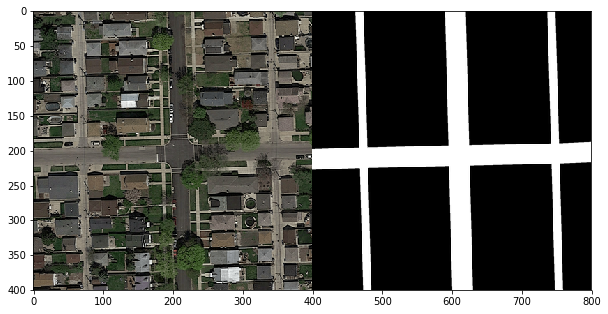

In [8]:
cimg = hf.concatenate_images(imgs[0], gt_imgs[0])
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(cimg, cmap='Greys_r')

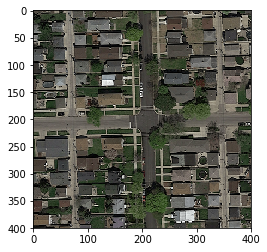

In [9]:
plt.imshow(imgs[0])

In [40]:
def augment_images(images, images_path, gts, gts_path, augment_num):
    data_gen_args  = dict(horizontal_flip=True, 
                          vertical_flip=True, 
                          height_shift_range=0.2, 
                          width_shift_range=0.2, 
                          rotation_range=20, 
                          zoom_range=[0.9, 1.25], 
                          # share_range = 0.15,
                          fill_mode="reflect"  # Because ......
                         )
    
    image_gen = ImageDataGenerator(**data_gen_args)
    gt_gen = ImageDataGenerator(**data_gen_args)
    
    save_prefix = "aug_"
    
    for i in range(len(images)):
        image_expanded = np.expand_dims(images[i], 0)
        gt_expanded = np.expand_dims(gts[i], 2)  # 1 i siste dimensjon gir gray scale???
        gt_expanded = np.expand_dims(gt_expanded, 0)

        seed = 12345
        
        # Nå bør denne også funke!!!
        """
        aug_iter = image_gen.flow(image_expanded, seed=seed, save_to_dir=images_path, save_prefix=save_prefix+str(i))
        gt_iter = gt_gen.flow(gt_expanded, seed=seed, save_to_dir=gts_path, save_prefix=save_prefix+str(i))

        for j in range(augment_num):
            next(aug_iter)
            next(gt_iter)
        """
        j = 0
        for b in image_gen.flow(image_expanded, seed=seed+j, save_to_dir=images_path, save_prefix=save_prefix+str(i)):
            j += 1
            if (j == augment_num):
                break
        
        j = 0
        for b in gt_gen.flow(gt_expanded, seed=seed+j, save_to_dir=gts_path, save_prefix=save_prefix+str(i)):
            j += 1
            if (j == augment_num):
                break
        
        
augment_num = 10

if not os.listdir(aug_image_dir):
    print("Created augemented pictures")
    augment_images(imgs, aug_image_dir, gt_imgs, aug_gt_dir, augment_num)
else:
    print("Augmented pictures exists")

Created augemented pictures


The question is if we should create salt and pepper and gaussian noice on the pictures we have or do it on duplicates effectivly doubleing the size of our dataset.

In [41]:
files = os.listdir(aug_image_dir)
# Load all images and groundtruths
n = len(files)
print(n)
aug_imgs = [hf.load_image(aug_image_dir + files[i]) for i in range(n)]
aug_gt_imgs = [hf.load_image(aug_gt_dir + files[i]) for i in range(n)]

1000


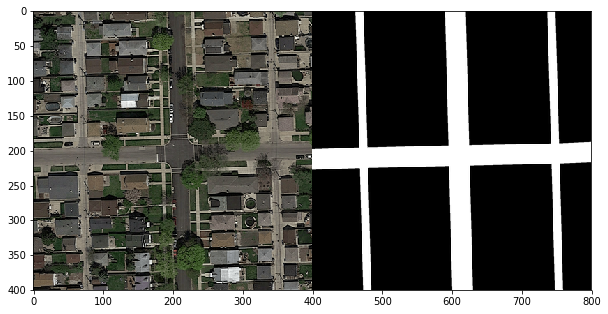

In [42]:
cimg = hf.concatenate_images(imgs[0], gt_imgs[0])
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(cimg, cmap='Greys_r')

In [43]:
print(aug_gt_imgs[0].shape)

(400, 400)
